In [ ]:
%matplotlib inline

*****************
Specifying Colors
*****************

Matplotlib recognizes the following formats in the table below to specify a
color.

+--------------------------------------+--------------------------------------+
| Format                               | Example                              |
+======================================+======================================+
| RGB or RGBA (red, green, blue, alpha)| - ``(0.1, 0.2, 0.5)``                |
| tuple of float values in a closed    | - ``(0.1, 0.2, 0.5, 0.3)``           |
| interval [0, 1].                     |                                      |
+--------------------------------------+--------------------------------------+
| Case-insensitive hex RGB or RGBA     | - ``'#0f0f0f'``                      |
| string.                              | - ``'#0f0f0f80'``                    |
+--------------------------------------+--------------------------------------+
| Case-insensitive RGB or RGBA string  | - ``'#abc'`` as ``'#aabbcc'``        |
| equivalent hex shorthand of          | - ``'#fb1'`` as ``'#ffbb11'``        |
| duplicated characters.               |                                      |
+--------------------------------------+--------------------------------------+
| String representation of float value | - ``'0.8'`` as light gray            |
| in closed interval ``[0, 1]`` for    | - ``'0'`` as black                   |
| black and white, respectively.       | - ``'1'`` as white                   |
+--------------------------------------+--------------------------------------+
| Single character shorthand notation  | - ``'b'`` as blue                    |
| for shades of colors.                | - ``'g'`` as green                   |
|                                      | - ``'r'`` as red                     |
| .. note:: The colors green, cyan,    | - ``'c'`` as cyan                    |
|           magenta, and yellow do not | - ``'m'`` as magenta                 |
|           coincide with X11/CSS4     | - ``'y'`` as yellow                  |
|           colors.                    | - ``'k'`` as black                   |
|                                      | - ``'w'`` as white                   |
+--------------------------------------+--------------------------------------+
| Case-insensitive X11/CSS4 color name | - ``'aquamarine'``                   |
| with no spaces.                      | - ``'mediumseagreen'``               |
+--------------------------------------+--------------------------------------+
| Case-insensitive color name from     | - ``'xkcd:sky blue'``                |
| `xkcd color survey`_ with ``'xkcd:'``| - ``'xkcd:eggshell'``                |
| prefix.                              |                                      |
+--------------------------------------+--------------------------------------+
| Case-insensitive Tableau Colors from | - ``'tab:blue'``                     |
| 'T10' categorical palette.           | - ``'tab:orange'``                   |
|                                      | - ``'tab:green'``                    |
|                                      | - ``'tab:red'``                      |
|                                      | - ``'tab:purple'``                   |
| .. note:: This is the default color  | - ``'tab:brown'``                    |
|           cycle.                     | - ``'tab:pink'``                     |
|                                      | - ``'tab:gray'``                     |
|                                      | - ``'tab:olive'``                    |
|                                      | - ``'tab:cyan'``                     |
+--------------------------------------+--------------------------------------+
| "CN" color spec where ``'C'``        | - ``'C0'``                           |
| precedes a number acting as an index | - ``'C1'``                           |
| into the default property cycle.     +--------------------------------------+
|                                      | :rc:`axes.prop_cycle`                |
| .. note:: Matplotlib indexes color   |                                      |
|           at draw time and defaults  |                                      |
|           to black if cycle does not |                                      |
|           include color.             |                                      |
+--------------------------------------+--------------------------------------+


.. seealso::

    The following links provide more information on colors in Matplotlib.
        * :doc:`/gallery/color/color_demo` Example
        * `matplotlib.colors` API
        * :doc:`/gallery/color/named_colors` Example

"Red", "Green", and "Blue" are the intensities of those colors. In combination,
they represent the colorspace.

Matplotlib draws Artists based on the ``zorder`` parameter. If there are no
specified values, Matplotlib defaults to the order of the Artists added to the
Axes.

The alpha for an Artist controls opacity. It indicates how the RGB color of the
new Artist combines with RGB colors already on the Axes.

The two Artists combine with alpha compositing. Matplotlib uses the equation
below to compute the result of blending a new Artist.

::

    RGB_{new} = RGB_{below} * (1 - \alpha) + RGB_{artist} * \alpha

Alpha of 1 indicates the new Artist completely covers the previous color.
Alpha of 0 for top color is not visible; however, it contributes to blending
for intermediate values as the cumulative result of all previous Artists. The
following table contains examples.

+---------------+-------------------------------------------------------------+
| Alpha value   | Visual                                                      |
+===============+=============================================================+
| ``0.3``       | .. image:: ../../_static/color_zorder_A.png                 |
+---------------+-------------------------------------------------------------+
| ``1``         | .. image:: ../../_static/color_zorder_B.png                 |
+---------------+-------------------------------------------------------------+

<div class="alert alert-info"><h4>Note</h4><p>Re-ordering Artists is not commutative in Matplotlib.</p></div>


"CN" color selection
--------------------

Matplotlib converts "CN" colors to RGBA when drawing Artists. The
:doc:`/tutorials/intermediate/color_cycle` section contains additional
information about controlling colors and style properties.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

th = np.linspace(0, 2*np.pi, 128)


def demo(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(3, 3))

    ax.set_title('style: {!r}'.format(sty), color='C0')

    ax.plot(th, np.cos(th), 'C1', label='C1')
    ax.plot(th, np.sin(th), 'C2', label='C2')
    ax.legend()


demo('default')
demo('seaborn')

The first color ``'C0'`` is the title. Each plot uses the second and third
colors of each style's :rc:`axes.prop_cycle`. They are ``'C1'`` and ``'C2'``,
respectively.


Comparison between X11/CSS4 and xkcd colors
-------------------------------------------

The xkcd colors come from a `user survey conducted by the webcomic xkcd
<https://blog.xkcd.com/2010/05/03/color-survey-results/>`__.

95 out of the 148 X11/CSS4 color names also appear in the xkcd color survey.
Almost all of them map to different color values in the X11/CSS4 and in
the xkcd palette. Only 'black', 'white' and 'cyan' are identical.

For example, ``'blue'`` maps to ``'#0000FF'`` whereas ``'xkcd:blue'`` maps to
``'#0343DF'``.  Due to these name collisions, all xkcd colors have the
``'xkcd:'`` prefix.

The visual below shows name collisions. Color names where color values agree
are in bold.



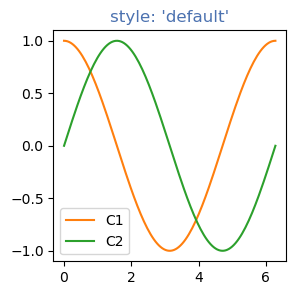

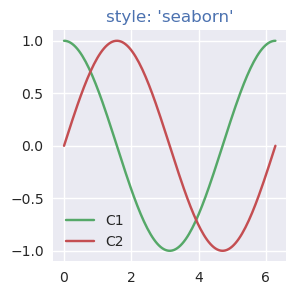

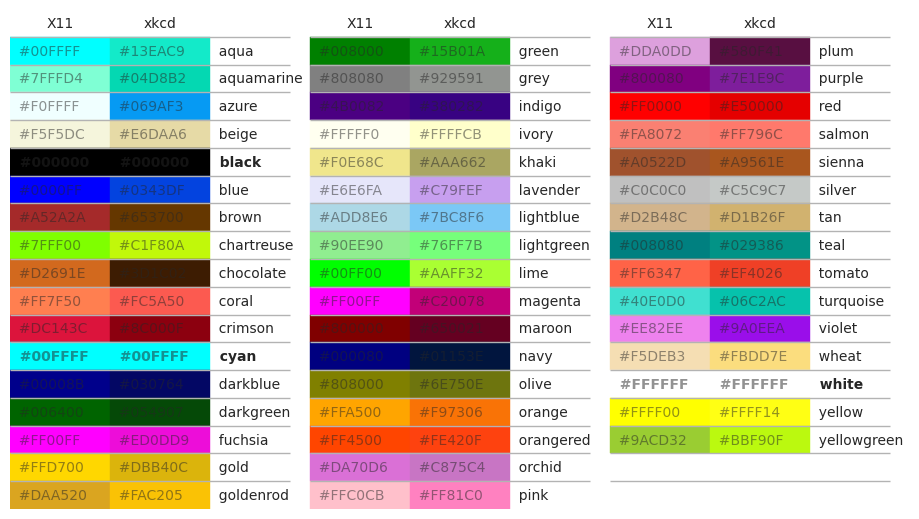

In [2]:
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

overlap = {name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS}

fig = plt.figure(figsize=[9, 5])
ax = fig.add_axes([0, 0, 1, 1])

n_groups = 3
n_rows = len(overlap) // n_groups + 1

for j, color_name in enumerate(sorted(overlap)):
    css4 = mcd.CSS4_COLORS[color_name]
    xkcd = mcd.XKCD_COLORS["xkcd:" + color_name].upper()

    col_shift = (j // n_rows) * 3
    y_pos = j % n_rows
    text_args = dict(va='center', fontsize=10,
                     weight='bold' if css4 == xkcd else None)
    ax.add_patch(mpatch.Rectangle((0 + col_shift, y_pos), 1, 1, color=css4))
    ax.add_patch(mpatch.Rectangle((1 + col_shift, y_pos), 1, 1, color=xkcd))
    ax.text(0 + col_shift, y_pos + .5, '  ' + css4, alpha=0.5, **text_args)
    ax.text(1 + col_shift, y_pos + .5, '  ' + xkcd, alpha=0.5, **text_args)
    ax.text(2 + col_shift, y_pos + .5, '  ' + color_name, **text_args)

for g in range(n_groups):
    ax.hlines(range(n_rows), 3*g, 3*g + 2.8, color='0.7', linewidth=1)
    ax.text(0.5 + 3*g, -0.5, 'X11', ha='center', va='center')
    ax.text(1.5 + 3*g, -0.5, 'xkcd', ha='center', va='center')

ax.set_xlim(0, 3 * n_groups)
ax.set_ylim(n_rows, -1)
ax.axis('off')

plt.show()